In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
houses = pd.read_csv("C:/Users/abel/Desktop/housing.csv", index_col=0)

In [54]:
houses.columns #Features

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [55]:
houses.shape#Number of instances and number of features in order

(546, 12)

In [56]:
houses.dtypes#datatype of features

price       float64
lotsize       int64
bedrooms      int64
bathrms       int64
stories       int64
driveway     object
recroom      object
fullbase     object
gashw        object
airco        object
garagepl      int64
prefarea     object
dtype: object

In [57]:
houses.isnull().sum()#no null values

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

In [58]:
#Of the two: which one is the independent and dependent variable
#independent variable = lotsize
#dependent variable = price of the house
#splitting data set
split_houses = houses.loc[:(0.7*len(houses))]
split_houses.shape

(382, 12)

In [59]:
houses_columns = pd.DataFrame(data=split_houses, columns=['price', 'lotsize'])
houses_columns.head()

,price,lotsize
1,42000.0,5850
2,38500.0,4000
3,49500.0,3060
4,60500.0,6650
5,61000.0,6360


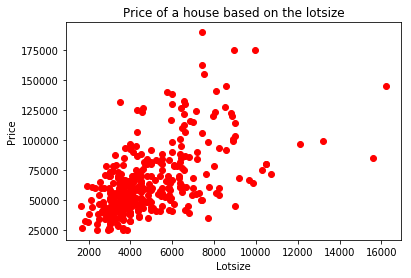

In [60]:
#Draw a scatter plot of the two variables
price = houses_columns['price']
lotsize = houses_columns['lotsize']
plt.scatter(lotsize, price,  color='red')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.title('Price of a house based on the lotsize')
plt.show()

In [61]:
#Create a user defined function that receives the two variables and returns a regression model
def linear_regression_model(x,y):
    n= np.size(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    #centroid = x_mean, y_mean
    
    #parameters: y=b_0 +b_1X
    xS = np.sum(x*y) - n*y_mean*x_mean
    yS = np.sum(x*x) - n*x_mean*x_mean
    b_1 = xS / yS
    b_0 = y_mean - b_1*x_mean
    return (b_1, b_0)

def regression_line(x,y,l):
    plt.scatter(x, y , color='red')
    yP = l[1]+l[0]*x
    plt.plot(x, yP, color='blue')
    plt.xlabel('Lotsize')
    plt.ylabel('Price')
    plt.title('Price of a house based on the lotsize')
    plt.show()

In [62]:
#What is the linear regression model learned?
x = np.array(lotsize)
y = np.array(price)
linear_regression_model(x,y)
l = linear_regression_model(x,y)
print('Linear regression model equation: \n y={}+{}X'.format(l[1], l[0]))

Linear regression model equation: 
 y=27930.188218578725+7.5516700654909155X


In [63]:
#Use sklearn’s train_test_split() method to split your data(70% for training and 30% for testing
houses_data = pd.DataFrame(columns=['price', 'lotsize'], data = houses)
xSet = pd.DataFrame(houses_data['lotsize'])
ySet = pd.DataFrame(houses_data['price'])
XtrainSet, XtestSet, YtrainSet, YtestSet = train_test_split(xSet, ySet, test_size = 0.30, random_state=0)
print(XtrainSet.shape, YtrainSet.shape)

(382, 1) (382, 1)


In [64]:
#What is the linear regression model that is learned?
model=LinearRegression()
model.fit(XtrainSet, YtrainSet)
yP = model.predict(XtestSet)
print('Coefficient(b_1):', model.coef_)
print('Intercept(b_0):', model.intercept_)
print('Linear Regression Model:')
print(model.predict(YtestSet))

Coefficient(b_1): [[7.44691016]]
Intercept(b_0): [29363.80493029]
Linear Regression Model:
[[ 453837.68410206]
 [1012355.94617018]
 [ 430752.26260324]
 [ 362240.68912289]
 [ 513412.96538933]
 [ 528306.78571114]
 [ 528306.78571114]
 [ 379368.58249298]
 [ 550647.51619387]
 [ 342134.03168844]
 [ 446390.77394115]
 [ 465380.39485147]
 [ 476178.41458478]
 [ 766607.91086021]
 [ 513412.96538933]
 [ 952780.66488291]
 [ 327240.21136662]
 [ 818736.28198656]
 [ 290005.66056208]
 [ 423305.35244234]
 [ 680968.44400976]
 [1183634.87987107]
 [ 554370.97127432]
 [ 453837.68410206]
 [ 625116.61780295]
 [ 654159.56743049]
 [ 457561.13918251]
 [1079378.13761835]
 [ 215536.55895299]
 [ 409156.22313661]
 [ 543200.60603296]
 [ 549902.82517778]
 [ 373411.05436425]
 [ 911822.65899792]
 [ 587882.06699841]
 [ 556605.04432259]
 [ 550647.51619387]
 [ 230430.37927481]
 [ 311601.70002871]
 [ 476178.41458478]
 [ 800119.00658429]
 [ 364474.76217116]
 [ 332825.3939873 ]
 [ 472454.95950433]
 [ 662351.16860749]
 [ 587882

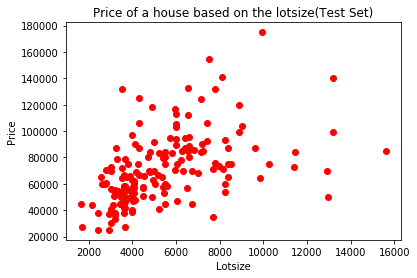

In [65]:
#Redraw the scatter plot of both the dependent andindependent variable that was learnt
plt.scatter(XtestSet, YtestSet , color='red')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.title('Price of a house based on the lotsize(Test Set)')
plt.show()

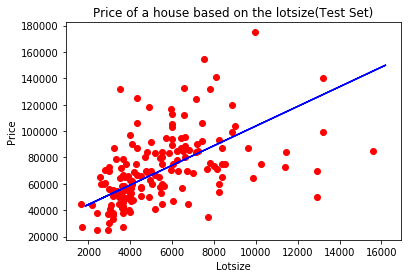

In [66]:
#Plot a line of the learned regression model. Hint(X_test against predicted Y).
plt.scatter(XtestSet, YtestSet , color='red')
plt.plot(XtrainSet, model.predict(XtrainSet), color='blue')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.title('Price of a house based on the lotsize(Test Set)')
plt.show()

In [68]:
#determine the SSE and MSE of the learned model
Ytrain = pd.DataFrame(YtrainSet)
pred = model.predict(Ytrain)
squared_errors = (YtrainSet-pred)**2
SSE = np.sum(squared_errors)
print('SSE:',SSE) 
print('Mean Squared Error:', mean_squared_error(XtestSet,yP))

SSE: price    9.197839e+13
dtype: float64
Mean Squared Error: 4421579497.289248


In [69]:
#coefficient of determination
print('Coefficient of Determination:', r2_score(YtestSet, yP))

Coefficient of Determination: 0.1877932250837162


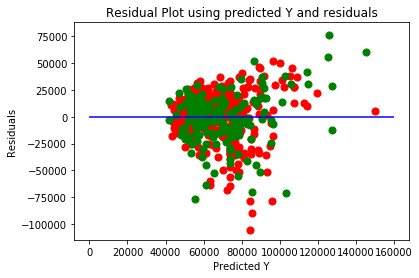

In [71]:
#residual plot
#predicted Y vs residuals
plt.scatter(model.predict(XtrainSet), model.predict(XtrainSet)-YtrainSet, c='red', s=50)
plt.scatter(model.predict(XtestSet), model.predict(XtestSet)-YtestSet, c='green', s=50)
plt.hlines(y=0, xmin=0, xmax=160000, color='blue')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.title('Residual Plot using predicted Y and residuals')
plt.show()

In [72]:
#Import load_boston
from sklearn.datasets import load_boston

In [73]:
boston = load_boston()

In [74]:
type(boston)

sklearn.utils.Bunch

In [75]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [76]:
print (boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [77]:
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [78]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [79]:
bostondata = pd.DataFrame(boston.data)
bostondata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [80]:
bostondata.columns = boston.feature_names
bostondata['Price'] = boston.target
bostondata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [83]:
xBoston = bostondata.drop('Price', axis = 1)
lnBoston = LinearRegression()

XtrainSetBoston, XtestSetBoston, YtrainSetBoston, YtestSetBoston = train_test_split(xBoston, bostondata.Price, test_size = 0.30, random_state=0)
xBoston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [85]:
bostonmodel = lnBoston.fit(XtrainSetBoston,YtrainSetBoston)
trainPred = lnBoston.predict(XtrainSetBoston)
testPred = lnBoston.predict(XtestSetBoston)
intercept = lnBoston.intercept_
bostonslope = lnBoston.coef_
print('Coefficients:', bostonslope)
print('Intercept:', intercept)

Coefficients: [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]
Intercept: 37.937107741833344


In [87]:
c1 = pd.DataFrame(slope,xBoston.columns, columns=['Coefficients'])
c1

,Coefficients
CRIM,-0.121310
ZN,0.044466
INDUS,0.011342
CHAS,2.511246
NOX,-16.231253
RM,3.859068
AGE,-0.009985
DIS,-1.500270
RAD,0.242143
TAX,-0.011072


In [88]:
print('y = ' ,intercept, '+' , 'b' , bostonslope)

y =  37.937107741833344 + b [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]


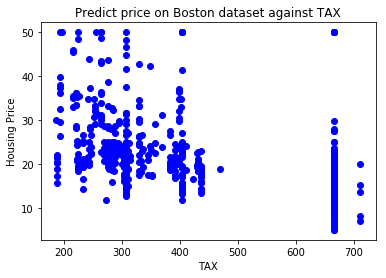

In [89]:
plt.scatter(bostondata.TAX, bostondata.Price , color='blue')
plt.xlabel('TAX')
plt.ylabel('Housing Price')
plt.title('Predict price on Boston dataset against TAX')
plt.show()

In [90]:
mse = np.mean((bostondata.Price - lnBoston.predict(xBoston))**2)
print('MSE:' ,mse)

MSE: 22.1324043691829
